# Imports

In [111]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sys.path.append(os.getcwd() + '/refi')
import retirement_analysis as ra
import constants
#import asset
#import consumption
#import inflation
import portfolio as pf

import series.base_series as base_series
from series.consumption import StaticRetirementConsumption
from series.ssb import StaticRetirementSSB
from series.deferral import StaticPreRetirementDeferral

# Constants

In [312]:
initial_balance = 400000
initial_cpi = 275
initial_age = 30
initial_deferral = 30000
retirement_age = 60
retirement_consumption = 75000
retirement_ssb = 10000
benefits_age = 67
death_age = 100

In [313]:
num_years = death_age - initial_age + 1

In [314]:
geo_mean_inflation = .02

In [315]:
equity_return_by_pct = {
    50: .0717 + geo_mean_inflation,
    25: .0605 + geo_mean_inflation,
    10: .0481 + geo_mean_inflation
}

bond_return_by_pct = {
    50: .5*(.0116 + .0309) + geo_mean_inflation,
    25: .5*(-.0040 + .0100) + geo_mean_inflation,
    10: .5*(-.0080 + .0030) + geo_mean_inflation
}

cash_return_by_pct = {
    50: .0075 + geo_mean_inflation,
    25: -.0043 + geo_mean_inflation,
    10: -.0111 + geo_mean_inflation
}

In [316]:
pctile = 25
geo_mean_equity_return = equity_return_by_pct[pctile]
geo_mean_bond_return = bond_return_by_pct[pctile]
geo_mean_cash_return = cash_return_by_pct[pctile]

In [317]:
print('Equity: {0:.4f}'.format(geo_mean_equity_return))
print('Bonds: {0:.4f}'.format(geo_mean_bond_return))
print('Cash: {0:.4f}'.format(geo_mean_cash_return))

Equity: 0.0805
Bonds: 0.0230
Cash: 0.0157



# Set up Series

In [318]:
equity = base_series.StaticSeries(num_years, geo_mean_equity_return)
bond = base_series.StaticSeries(num_years, geo_mean_bond_return)
cash = base_series.StaticSeries(num_years, geo_mean_cash_return)

In [319]:
assets = [equity, bond, cash]
balance = initial_balance
glidepath = constants.fidelity_glidepath

In [320]:
portfolio = pf.Portfolio(assets, glidepath, balance)

In [321]:
inflation = base_series.StaticSeries(num_years, geo_mean_inflation)

In [322]:
cpi = base_series.StaticGrowthSeries(initial_value=100, growth_series=inflation)

In [323]:
consumption = StaticRetirementConsumption(retirement_consumption, cpi, initial_age, retirement_age)

In [324]:
deferral = StaticPreRetirementDeferral(initial_deferral, cpi, initial_age, retirement_age)

In [325]:
ssb = StaticRetirementSSB(retirement_ssb, cpi, initial_age, benefits_age)

# Ret Analysis

In [326]:
retirement_analysis = ra.RetirementAnalysis(
    initial_age=initial_age,
    retirement_age=retirement_age,
    death_age=death_age,
    portfolio=portfolio,
    deferral_scenario=deferral,
    consumption_scenario=consumption,
    inflation_scenario=inflation,
    cpi_scenario=cpi,
    ssb_scenario=ssb)

In [327]:
retirement_analysis.simulate()

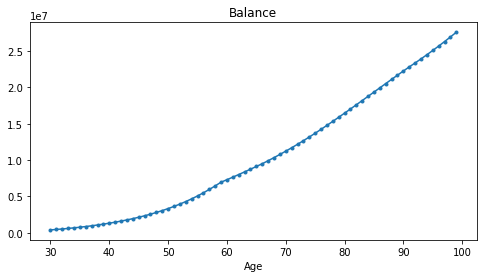

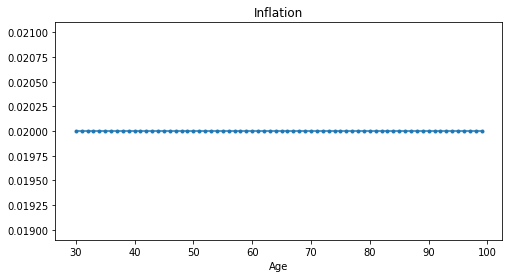

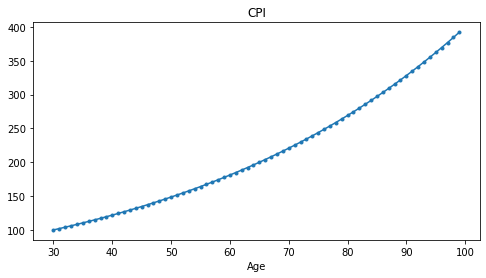

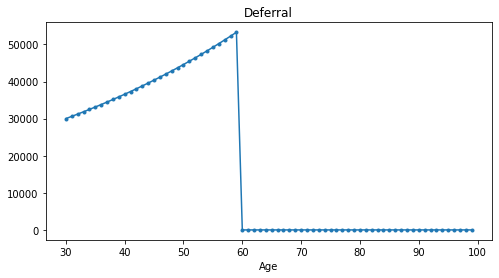

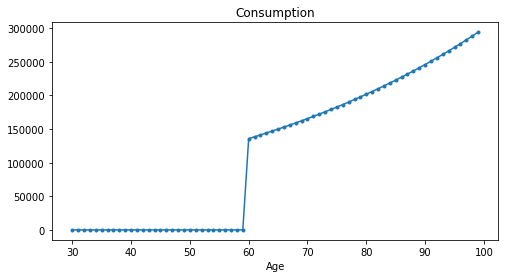

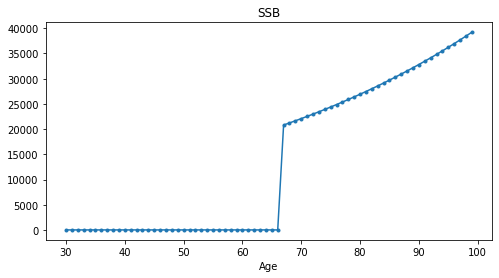

In [328]:
retirement_analysis.plot()